In [21]:
# --- Setup (works in Google Colab) ---
!pip -q install scikit-learn matplotlib pandas numpy

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Text imports (used only in MODE="text")
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.datasets import fetch_20newsgroups

Accuracy: 0.9210526315789473

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



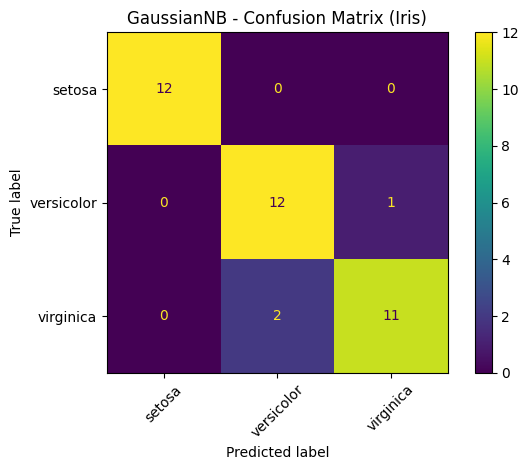


New sample predicted class: setosa


In [22]:
# -------- Choose mode: "gaussian" or "text" --------
MODE = "gaussian"  # change to "text" for a text example

if MODE == "gaussian":
    # ====== Continuous features example: GaussianNB on Iris ======
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    target_names = iris.target_names
    feature_names = iris.feature_names

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=42
    )

    # Baseline GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=target_names, xticks_rotation=45
    )
    plt.title("GaussianNB - Confusion Matrix (Iris)")
    plt.tight_layout()
    plt.show()

    # Predict a new sample (Iris order)
    sample = np.array([[5.4, 3.9, 1.7, 0.4]])
    pred = gnb.predict(sample)[0]
    print(f"\nNew sample predicted class: {target_names[pred]}")

elif MODE == "text":
    # ====== Text classification example: MultinomialNB with TF–IDF ======
    categories = ["sci.space", "comp.graphics", "rec.sport.baseball"]
    train = fetch_20newsgroups(subset="train", categories=categories, remove=("headers","footers","quotes"))
    test  = fetch_20newsgroups(subset="test",  categories=categories, remove=("headers","footers","quotes"))

    # Pipeline: TF-IDF -> MultinomialNB
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english", max_df=0.8)),
        ("nb", MultinomialNB())
    ])

    # Quick tuning of smoothing (alpha)
    grid = GridSearchCV(
        pipe,
        {"nb__alpha": [0.1, 0.5, 1.0, 2.0]},
        scoring="accuracy",
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(train.data, train.target)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(test.data)

    print("Best Params:", grid.best_params_)
    print("Test Accuracy:", accuracy_score(test.target, y_pred))
    print("\nClassification Report:")
    print(classification_report(test.target, y_pred, target_names=categories))

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        test.target, y_pred, display_labels=categories, xticks_rotation=45
    )
    plt.title("MultinomialNB (TF-IDF) - Confusion Matrix (20 Newsgroups subset)")
    plt.tight_layout()
    plt.show()

    # Predict a new text
    sample_text = ["NASA announced a new mission to study exoplanets."]
    pred = best_model.predict(sample_text)[0]
    print(f"\nNew text predicted class: {categories[pred]}")

else:
    raise ValueError('MODE must be "gaussian" or "text"')